In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk 
import re 

import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import pandas as pd 
texts = pd.read_excel("texts_cluster.xlsx")

text = list(texts.Processed)
text_raw = list(texts.Raw)

texts.head(5)

,Raw,Processed
0,Отпуск 2020. Крым. Судак. Новый Свет. Феодосия.,отпуск 2020 крым судак новый свет феодосий
1,Г-гордость❣️ я очень довольна результатом. Оче...,год гордость очень довольный результат очень д...
2,"Лето, август, отпуск, но не у меня. В период...",лето август отпуск не_у период отпуск добавлят...
3,"Отпуск-2020. Никакого Лазурного берега, сплошн...",отпуск 2020 никакой лазурный берег сплошной ру...
4,Мой отпуск на море\n#бугазскаякоса #море #солц...,отпуск мор бугазскаякос мор солца отпуск отдых...


In [3]:
vectorizer = TfidfVectorizer(max_df = 0.75, min_df = 0.0005)
matrix = vectorizer.fit_transform(text)
matrix.shape

(33183, 5494)

Detecting the optimal number of clusters using a dendogram.

dist is defined as 1 - the cosine similarity of each document. Cosine similarity is measured against the tf-idf matrix and can be used to generate a measure of similarity between each document and the other documents in the corpus (each synopsis among the synopses). Subtracting it from 1 provides cosine distance which I will use for plotting on a euclidean (2-dimensional) plane.



For doing so, I define the linkage_matrix using ward clustering pre-computed distances. 

In [8]:
X_tr = matrix.toarray()

MemoryError: 

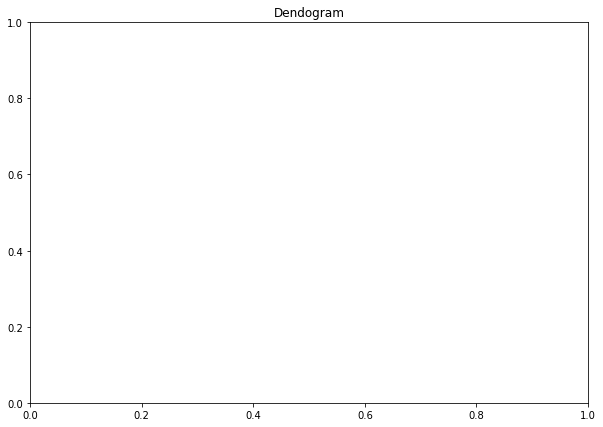

In [9]:
plt.figure(figsize=(10, 7))  
plt.title("Dendogram")  
dend = shc.dendrogram(shc.linkage(X_tr, method='ward'))

In [ ]:
linkage_matrix = shc.ward(dist)

fig, ax = plt.subplots(figsize=(15, 20)) 
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(axis= 'x', which='both', bottom='off', top='off', labelbottom='off')

plt.tight_layout()